In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [80]:
X1 = np.array([[1,2,3],[2,4,7],[1.5, 4, 8]])
y1 = np.array([1,1,1])

In [168]:
file = open("heights1.dat", 'r') #first column is age, second column is height
text = file.read()
lines = text.split("\n")
lines_data = [l.split(" ") for l in lines]
lines_data = np.array(lines_data[1:-1]).astype(float)
X = lines_data[:,0].reshape(-1,1)
y = lines_data[:,1].reshape(-1,1)
n_samples = X.shape[0]


In [169]:
print(X[:4,:])
print(y[:4,:])

[[225.5]
 [228.5]
 [188.5]
 [123.5]]
[[176.53]
 [163.26]
 [172.7 ]
 [140.04]]


In [170]:
max_X = max(X)
max_y = max(y)

X = X/max_X
y = y/max_y

In [171]:
X = np.hstack((np.ones((n_samples,1)), X))
X

array([[1.        , 0.93958333],
       [1.        , 0.95208333],
       [1.        , 0.78541667],
       [1.        , 0.51458333],
       [1.        , 0.41041667],
       [1.        , 0.58541667],
       [1.        , 0.29375   ],
       [1.        , 0.97708333],
       [1.        , 0.10208333],
       [1.        , 0.61875   ],
       [1.        , 0.29791667],
       [1.        , 0.26875   ],
       [1.        , 0.90625   ],
       [1.        , 0.40208333],
       [1.        , 1.        ],
       [1.        , 0.68958333],
       [1.        , 0.56458333],
       [1.        , 0.47291667],
       [1.        , 0.30625   ],
       [1.        , 0.83541667],
       [1.        , 0.54375   ],
       [1.        , 0.79375   ],
       [1.        , 0.86041667],
       [1.        , 0.80625   ],
       [1.        , 0.58541667],
       [1.        , 0.96041667],
       [1.        , 0.71875   ],
       [1.        , 0.39791667],
       [1.        , 0.31458333],
       [1.        , 0.25208333],
       [1.

In [172]:
np.random.random((3,3))

array([[0.94341908, 0.16443509, 0.21861556],
       [0.94581451, 0.98865489, 0.78594725],
       [0.18554961, 0.52297518, 0.95500954]])

In [195]:
n_components = 2
n_features = 2
gamma = np.random.random((n_components, n_features))

def softmax_gating(gamma, X):
    
    temp  = np.exp(np.matmul(X, gamma.T))
    sum_temp = np.repeat( np.sum(temp,1).reshape(-1,1), repeats=n_components,axis=1)
    softmax = np.divide(temp, sum_temp)
    
    return softmax

S = softmax_gating(gamma, X)
S


array([[0.76319114, 0.23680886],
       [0.7650601 , 0.2349399 ],
       [0.7393061 , 0.2606939 ],
       [0.6937465 , 0.3062535 ],
       [0.67508637, 0.32491363],
       [0.70608681, 0.29391319],
       [0.65350903, 0.34649097],
       [0.76876727, 0.23123273],
       [0.61668497, 0.38331503],
       [0.71179248, 0.28820752],
       [0.65429128, 0.34570872],
       [0.64879818, 0.35120182],
       [0.75815728, 0.24184272],
       [0.67356821, 0.32643179],
       [0.77212941, 0.22787059],
       [0.72369524, 0.27630476],
       [0.70248748, 0.29751252],
       [0.686354  , 0.313646  ],
       [0.65585328, 0.34414672],
       [0.74722054, 0.25277946],
       [0.69886288, 0.30113712],
       [0.74063625, 0.25936375],
       [0.75111763, 0.24888237],
       [0.74262319, 0.25737681],
       [0.70608681, 0.29391319],
       [0.76630038, 0.23369962],
       [0.72850709, 0.27149291],
       [0.67280776, 0.32719224],
       [0.65741192, 0.34258808],
       [0.64564137, 0.35435863],
       [0.

In [194]:
beta= np.random.random((n_components, n_features))
sigma = 1

def conditional_gaussian(X, y, beta, sigma):
    
    y_hat = np.matmul(X, beta.T)
    y_re = np.repeat(y, repeats=n_components, axis=1 )
    output = np.exp((-(y_re-y_hat)**2)/(2*sigma**2)) / (np.sqrt(2*np.pi)*sigma)

    return output

conditional_gaussian(X, y, beta, sigma)

array([[0.29300085, 0.37276439],
       [0.30997877, 0.38250544],
       [0.2972191 , 0.37007765],
       [0.33555206, 0.38418678],
       [0.3469217 , 0.38759364],
       [0.32550799, 0.38059406],
       [0.36136954, 0.39218608],
       [0.29289638, 0.37394417],
       [0.38273593, 0.39783015],
       [0.32012057, 0.37849393],
       [0.36021287, 0.39173421],
       [0.364438  , 0.39311967],
       [0.29322961, 0.37177784],
       [0.34790217, 0.3879023 ],
       [0.31010149, 0.38383585],
       [0.312918  , 0.37646025],
       [0.32897012, 0.38194071],
       [0.33993249, 0.38546009],
       [0.35924222, 0.39143944],
       [0.30997281, 0.37920935],
       [0.332466  , 0.38328845],
       [0.29663977, 0.37000457],
       [0.29391765, 0.37062652],
       [0.29588575, 0.36996797],
       [0.32756475, 0.3817393 ],
       [0.29291967, 0.37340919],
       [0.31160625, 0.37660133],
       [0.34838968, 0.3880551 ],
       [0.35827099, 0.39114333],
       [0.36641836, 0.39370313],
       [0.

In [196]:
def find_w (X, y, gamma, beta, sigma ):
    
    y_re = np.repeat(y, repeats=n_components, axis=1 )
    temp1 = np.matmul(X, gamma.T)
    temp2 = np.matmul(X, beta.T)
    temp2 = (-(y_re-temp2)**2)/(2*sigma**2)
    temp2 = np.exp(temp1 + temp2)
    sum_temp = np.repeat( np.sum(temp2,1).reshape(-1,1), repeats=n_components,axis=1)
    
    output = np.divide(temp2, sum_temp)
    
    return output

w=find_w (X, y, gamma, beta, sigma)

In [197]:
def find_sigma (X, y, gamma, beta):

    y_re = np.repeat(y, repeats=n_components, axis=1 )
    temp = np.matmul(X, beta.T)
    output = np.sqrt(np.mean(np.multiply(w, (y_re-temp))**2))

    return output
sigma=find_sigma (X, y, gamma, beta)

In [198]:
lambd=0.1
def find_beta (X, y, w):
    beta = np.zeros((n_components, n_features))
    
    for i in range(n_components):
        beta[i,:] = (np.linalg.inv(X.T@np.diag(w[:,i])@X+lambd*np.eye(n_features))@(X.T@np.diag(w[:,i])@y)).T
        
    return beta

find_beta(X, y,w)

array([[0.48350735, 0.55671041],
       [0.47651481, 0.56958612]])

In [199]:
def grad_gamma(X, w, gamma):
    S = softmax_gating(gamma, X)
    output = X.T@(w-S)
    return output

grad_gamma(X, w, gamma)

array([[-6.39108176,  6.39108176],
       [-4.06092393,  4.06092393]])

In [200]:
def hessian_gamma(X, w, gamma):
    
    S = softmax_gating(gamma, X)
    hessian = np.zeros((n_components,n_features,n_features))
    
    for i in range(n_components):
        S_ = np.diag(np.multiply(S[:,i], 1-S[:,i]))
        hessian[i,:,:] = -X.T@S_@X + lambd*np.eye(n_features)
        
    return hessian
hessian_gamma(X, w, gamma)

array([[[-45.6403569 , -23.32010838],
        [-23.32010838, -15.0127088 ]],

       [[-45.6403569 , -23.32010838],
        [-23.32010838, -15.0127088 ]]])

In [201]:
def mixture_prediction(X, gamma, beta, sigma, w):
    
    mean = np.matmul(X, beta.T)
    gate = softmax_gating(gamma, X)
    output = np.sum(np.multiply(mean, gate), axis=1)
    return output

y_hat= mixture_prediction(X, gamma, beta, sigma, w)
y_hat*max_y

array([55.06457071, 55.09973266, 54.52148541, 52.99908326, 52.18853276,
       53.47502623, 51.11311382, 55.16633834, 48.92750466, 53.67903547,
       51.15471846, 50.85836794, 54.96458223, 52.11773926, 55.22313826,
       54.07213822, 53.34111945, 52.69111312, 51.237202  , 54.72073551,
       53.202188  , 54.55631313, 54.81181014, 54.60732836, 53.47502623,
       55.12248104, 54.218635  , 52.08200296, 51.31872192, 50.68361941,
       54.92470191, 52.25842502, 54.57348104, 51.67376761, 52.56192542,
       51.82545106, 54.70501085, 50.98684119, 52.96923764, 49.7000661 ,
       53.89385762, 54.70501085, 54.84093749, 54.44984345, 54.00665694,
       52.22359122, 49.29544157, 50.90143786, 51.97342816, 51.02917578,
       51.43920564, 55.20804453, 51.78787923, 50.72767804, 51.93677915,
       51.86279123, 52.11773926, 55.04042882, 55.08815126, 49.3981757 ,
       52.90891675, 52.49602497, 52.00984804, 50.98684119, 53.39528043,
       49.34694075, 49.44914693, 49.94447306, 52.93918235, 51.23

In [202]:
def log_loss(X, y, gamma, beta, sigma, w):
    delta=0.000001
    gate = softmax_gating(gamma, X)
    cond = conditional_gaussian(X, y, beta, sigma)
    output = np.sum(np.multiply(w, np.log(gate+delta)+np.log(cond+delta)))
    
    return -output

log_loss(X, y, gamma, beta, sigma, w)

407.22704362495426

In [203]:
def mse(y, y_hat):
    
    output = np.mean((y-y_hat)**2)
    return output

In [204]:
help(np.random.random)
w=find_w (X, y, gamma, beta, sigma)

Help on built-in function random_sample:

random_sample(...) method of mtrand.RandomState instance
    random_sample(size=None)
    
    Return random floats in the half-open interval [0.0, 1.0).
    
    Results are from the "continuous uniform" distribution over the
    stated interval.  To sample :math:`Unif[a, b), b > a` multiply
    the output of `random_sample` by `(b-a)` and add `a`::
    
      (b - a) * random_sample() + a
    
    Parameters
    ----------
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m * n * k`` samples are drawn.  Default is None, in which case a
        single value is returned.
    
    Returns
    -------
    out : float or ndarray of floats
        Array of random floats of shape `size` (unless ``size=None``, in which
        case a single float is returned).
    
    Examples
    --------
    >>> np.random.random_sample()
    0.47108547995356098
    >>> type(np.random.random_

In [205]:
temp  = np.exp(np.matmul(X, gamma.T))
sum_temp = np.repeat( np.sum(temp,1).reshape(-1,1), repeats=n_components,axis=1)
softmax = np.divide(temp, sum_temp)


In [207]:
#np.random.seed(10)
gamma = np.random.random((n_components, n_features))*0.001
beta= np.random.random((n_components, n_features))*0.001
sigma = 0.1
lambd = 0.0001
#w=find_w (X, y, gamma, beta, sigma)
w=find_w (X, y, gamma, beta, sigma)
#w = np.random.random((n_samples, n_components))
l = log_loss(X, y, gamma, beta, sigma, w)
print(l)
n_iterations = 2
y_hat= mixture_prediction(X, gamma, beta, sigma, w)
print("mse:", mse(y, y_hat ))
for j in range(n_iterations):
    
    print("iteration:",j)
    #update beta
    #update sigma
    beta_ = find_beta(X, y,w)
    sigma = find_sigma (X, y, gamma, beta)
    beta = beta_

    #updata gamma
    
    
    grad = grad_gamma(X, w, gamma)
    h = hessian_gamma(X, w, gamma)
    prev_grad = 0
    while (np.sum((grad-prev_grad)**2)>0.01):
        
        for i in range(n_components):
            gamma[i,:] = gamma[i,:] - 0.01*(np.linalg.inv(h[i,:,:])@grad[:,i]).T
        prev_grad = grad
        grad = grad_gamma(X, w, gamma)
        h = hessian_gamma(X, w, gamma)
        print(np.linalg.norm(grad))
        
    
    #update w
    w=find_w (X, y, gamma, beta, sigma)

    print(gamma)
    
    #calculate loss
    l = log_loss(X, y, gamma, beta, sigma, w)
    y_hat= mixture_prediction(X, gamma, beta, sigma, w)
    
    print(l)
    print("mse:", mse(y, y_hat ))

3112.0142720324384
mse: 0.6330496176006097
iteration: 0
2.4597402763520004
[[ 5.01647805e-04 -3.32689039e-05]
 [ 7.95547913e-04  8.15899436e-04]]
151.4426663457922
mse: 0.0471188837598952
iteration: 1
[[ 5.01647805e-04 -3.32689039e-05]
 [ 7.95547913e-04  8.15899436e-04]]
-96.24820207989852
mse: 0.04711855192169004


In [185]:
gate = softmax_gating(gamma, X)
cond = conditional_gaussian(X, y, beta, sigma)
output = np.sum(np.multiply(w, np.log(gate+0.00001)+np.log(cond+0.00001)))
cond

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


array([[nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan,

In [186]:
gate

array([[0.00000000e+000,             nan],
       [0.00000000e+000,             nan],
       [0.00000000e+000, 1.00000000e+000],
       [1.31780268e-240, 1.00000000e+000],
       [1.27140847e-143, 1.00000000e+000],
       [1.48058989e-306, 1.00000000e+000],
       [5.33153149e-035, 1.00000000e+000],
       [0.00000000e+000,             nan],
       [1.00000000e+000, 6.63419371e-145],
       [0.00000000e+000, 1.00000000e+000],
       [7.03841046e-039, 1.00000000e+000],
       [1.00720137e-011, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [7.29524491e-136, 1.00000000e+000],
       [0.00000000e+000,             nan],
       [0.00000000e+000, 1.00000000e+000],
       [3.69251036e-287, 1.00000000e+000],
       [8.19642126e-202, 1.00000000e+000],
       [1.22664760e-046, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [9.20891927e-268, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [0.0

In [165]:
y_hat= mixture_prediction(X, gamma, beta, sigma, w)
y_hat=y_hat*max_y

y_original=y*max_y

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


In [149]:
print("Gamma:", gamma)
print("Beta:", beta)
print("Sigma:", sigma)

Gamma: [[22.20939047 -6.74259754]
 [ 7.94513616 11.08878262]
 [10.28516712  7.98809103]]
Beta: [[0.43668184 0.68946566]
 [0.88521584 0.04051041]
 [0.5564467  0.47904748]]
Sigma: 0.005118894360276682


In [150]:
print("Gamma:", gamma)
print("Beta:", beta)
print("Sigma:", sigma)

Gamma: [[22.20939047 -6.74259754]
 [ 7.94513616 11.08878262]
 [10.28516712  7.98809103]]
Beta: [[0.43668184 0.68946566]
 [0.88521584 0.04051041]
 [0.5564467  0.47904748]]
Sigma: 0.005118894360276682


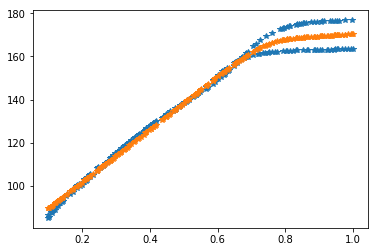

In [151]:
plt.plot(X[:,1], y_original,"*")
plt.plot(X[:,1], y_hat, "*")

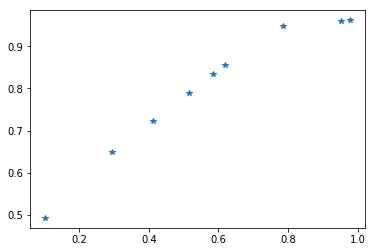

In [55]:
plt.plot(X[1:10,1], y_hat[1:10]/max_y, "*")

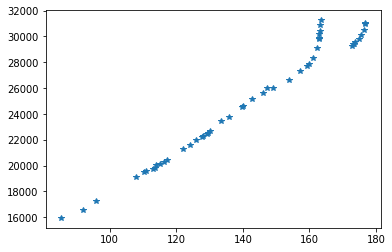

In [26]:
plt.plot(y_original[1:50], y_hat[1:50]*max_y, "*")

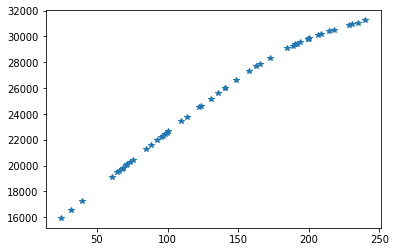

In [27]:
plt.plot(X[1:50,1]*max_X, y_hat[1:50]*max_y, "*")

In [28]:
np.max(softmax_gating(gamma, X))

0.7810217267065871

In [29]:
np.max(conditional_gaussian(X, y, beta, sigma))

45.859746229578924

In [139]:
y

array([[0.998247  ],
       [0.92320742],
       [0.97658901],
       [0.79190228],
       [0.73003845],
       [0.84296539],
       [0.64374576],
       [0.99949107],
       [0.48292242],
       [0.8693169 ],
       [0.65098394],
       [0.62378421],
       [0.99655055],
       [0.72449672],
       [0.92365981],
       [0.90426374],
       [0.82571816],
       [0.76854784],
       [0.65709116],
       [0.92077584],
       [0.80801855],
       [0.97930333],
       [0.99259217],
       [0.98286587],
       [0.83301289],
       [0.99903868],
       [0.91087989],
       [0.72172585],
       [0.66314182],
       [0.61049536],
       [0.92230265],
       [0.73546709],
       [0.98054739],
       [0.69005881],
       [0.75520244],
       [0.70176431],
       [0.9882945 ],
       [0.63882606],
       [0.78964035],
       [0.54258086],
       [0.88814748],
       [0.9206062 ],
       [0.92173716],
       [0.9171002 ],
       [0.90030536],
       [0.73275277],
       [0.52035739],
       [0.627

In [30]:
print("iteration:",j)
#update beta
#update sigma
beta_ = find_beta(X, y,w)
sigma = find_sigma (X, y, gamma, beta)
beta = beta_

#updata gamma
      
for i in range(n_components):
    gamma[i,:] = gamma[i,:] - (np.linalg.inv(h[i,:,:])@grad[:,i]).T

grad = grad_gamma(X, w, gamma)
h = hessian_gamma(X, w, gamma)
print(np.linalg.norm(grad))
    
    #update w
w=find_w (X, y, gamma, beta, sigma)

print(gamma)
    
#calculate loss
l = log_loss(X, y, gamma, beta, sigma, w)
print(l)

iteration: 4
22.548919305374653
[[ 3.49777488 -4.01471899]
 [ 2.28879731 -2.12776437]
 [-4.29941649  6.14262852]]
-414.0626523288591


In [31]:

grad = grad_gamma(X, w, gamma)
h = hessian_gamma(X, w, gamma)

h

array([[[-45.2566202 , -22.6377287 ],
        [-22.6377287 , -13.99008336]],

       [[-48.02031402, -25.21063878],
        [-25.21063878, -16.32976854]],

       [[-19.94681033, -15.76537263],
        [-15.76537263, -12.88155077]]])

In [32]:
sigma

0.007890764947720279

In [33]:
np.linalg.inv(h).shape

(3, 2, 2)

In [186]:
S

array([[0.39346396, 0.42460418, 0.18193186],
       [0.39364229, 0.42448602, 0.18187169],
       [0.39126684, 0.42605951, 0.18267366],
       [0.38741767, 0.42860722, 0.1839751 ],
       [0.38594092, 0.42958402, 0.18447506],
       [0.38842305, 0.42794201, 0.18363494],
       [0.38428943, 0.43067598, 0.1850346 ],
       [0.39399905, 0.42424963, 0.18175133],
       [0.38158203, 0.43246509, 0.18595287],
       [0.38889649, 0.4276287 , 0.18347481],
       [0.38434836, 0.43063702, 0.18501462],
       [0.38393588, 0.43090968, 0.18515444],
       [0.39298854, 0.42491915, 0.18209231],
       [0.38582287, 0.42966209, 0.18451504],
       [0.39432617, 0.42403285, 0.18164098],
       [0.38990326, 0.42696232, 0.18313442],
       [0.38812725, 0.42813774, 0.183735  ],
       [0.38682672, 0.42899815, 0.18417513],
       [0.38446625, 0.43055909, 0.18497467],
       [0.39197894, 0.42558791, 0.18243315],
       [0.38783154, 0.42833341, 0.18383505],
       [0.39138549, 0.42598094, 0.18263358],
       [0.

In [47]:
np.linalg.inv(h[1,:,:])@grad[:,1]

array([-0.16805856,  0.21626096])